## Data Import and Cleaning

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data file
ILI_results_path = "FluViewPhase2Data/ILINet.csv"

# Read the flu data and skip header row
ILI_df = pd.read_csv(ILI_results_path, skiprows=1)

ILI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27098 entries, 0 to 27097
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REGION TYPE        27098 non-null  object
 1   REGION             27098 non-null  object
 2   YEAR               27098 non-null  int64 
 3   WEEK               27098 non-null  int64 
 4   % WEIGHTED ILI     27098 non-null  object
 5   %UNWEIGHTED ILI    27098 non-null  object
 6   AGE 0-4            27098 non-null  object
 7   AGE 25-49          27098 non-null  object
 8   AGE 25-64          27098 non-null  object
 9   AGE 5-24           27098 non-null  object
 10  AGE 50-64          27098 non-null  object
 11  AGE 65             27098 non-null  object
 12  ILITOTAL           27098 non-null  object
 13  NUM. OF PROVIDERS  27098 non-null  object
 14  TOTAL PATIENTS     27098 non-null  object
dtypes: int64(2), object(13)
memory usage: 3.1+ MB


In [2]:
#When trying to convert columns to type float - returned that string "X" values present
#Change any X values to zero
ILI_df_clean = ILI_df.replace('X',0)

#Convert result columns to numbers
ILI_df_clean['ILITOTAL'] = pd.to_numeric(ILI_df_clean['ILITOTAL'])
ILI_df_clean['NUM. OF PROVIDERS'] = pd.to_numeric(ILI_df_clean['NUM. OF PROVIDERS'])
ILI_df_clean['TOTAL PATIENTS'] = pd.to_numeric(ILI_df_clean['TOTAL PATIENTS'])

ILI_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27098 entries, 0 to 27097
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REGION TYPE        27098 non-null  object
 1   REGION             27098 non-null  object
 2   YEAR               27098 non-null  int64 
 3   WEEK               27098 non-null  int64 
 4   % WEIGHTED ILI     27098 non-null  object
 5   %UNWEIGHTED ILI    27098 non-null  object
 6   AGE 0-4            27098 non-null  int64 
 7   AGE 25-49          27098 non-null  int64 
 8   AGE 25-64          27098 non-null  int64 
 9   AGE 5-24           27098 non-null  int64 
 10  AGE 50-64          27098 non-null  int64 
 11  AGE 65             27098 non-null  int64 
 12  ILITOTAL           27098 non-null  int64 
 13  NUM. OF PROVIDERS  27098 non-null  int64 
 14  TOTAL PATIENTS     27098 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 3.1+ MB


In [3]:
#Filter to desired states
filtered_df = ILI_df_clean.loc[(ILI_df_clean['REGION']=='New York')|(ILI_df_clean['REGION']=='Illinois')|
                               (ILI_df_clean['REGION']=='Texas')|(ILI_df_clean['REGION']=='Arizona')|
                               (ILI_df_clean['REGION']=='Georgia')|(ILI_df_clean['REGION']=='Pennsylvania')|
                               (ILI_df_clean['REGION']=='California')|(ILI_df_clean['REGION']=='Washington')|
                               (ILI_df_clean['REGION']=='Colorado')]

#Re-name columns to match other dataset
renamed_df = filtered_df.rename(columns = {'REGION': 'State', 'YEAR':'year', 'WEEK':'week'})
renamed_df.count()

REGION TYPE          4545
State                4545
year                 4545
week                 4545
% WEIGHTED ILI       4545
%UNWEIGHTED ILI      4545
AGE 0-4              4545
AGE 25-49            4545
AGE 25-64            4545
AGE 5-24             4545
AGE 50-64            4545
AGE 65               4545
ILITOTAL             4545
NUM. OF PROVIDERS    4545
TOTAL PATIENTS       4545
dtype: int64

In [4]:
#Return only desired columns and export to CSV
final_df = renamed_df[['State', 'year', 'week', 'ILITOTAL']]
final_df.to_csv('Data/ILI Totals for Desired States.csv', index=False)

## Summary Statistics

In [5]:
# Generate a summary statistics table for each state by year
state_group = final_df.groupby(['State', 'year'])
summary_statistics = state_group.agg({
    'ILITOTAL':['sum','mean', 'median','var', 'std', 'sem']})
summary_statistics

ILITOTAL                                                \
                     sum        mean median            var         std   
State      year                                                          
Arizona    2010     4088  314.461538  284.0   12924.269231  113.684956   
           2011    12705  244.326923  186.5   38672.381222  196.652946   
           2012    10362  199.269231  186.0    9703.024133   98.503930   
           2013    14226  273.576923  187.0   56110.915535  236.877427   
           2014    17608  332.226415  289.0   38795.755443  196.966382   
...                  ...         ...    ...            ...         ...   
Washington 2016     1683   32.365385   20.5    1032.236425   32.128436   
           2017     1866   35.884615   16.5    2279.751131   47.746739   
           2018     3478   66.884615   28.0    8220.260935   90.665655   
           2019    10845  208.557692   68.5  151090.604449  388.703749   
           2020    14402  626.173913  807.0  231670.150198  481.321255   

                             
                        sem  
State      year              
Arizona    2010   31.530534  
           2011   27.270857  
           2012   13.660037  
           2013   32.848989  
           2014   27.055413  
...                     ...  
Washington 2016    4.455412  
           2017    6.621281  
           2018   12.573064  
           2019   53.903511  
           2020  100.362419  

[99 rows x 6 columns]

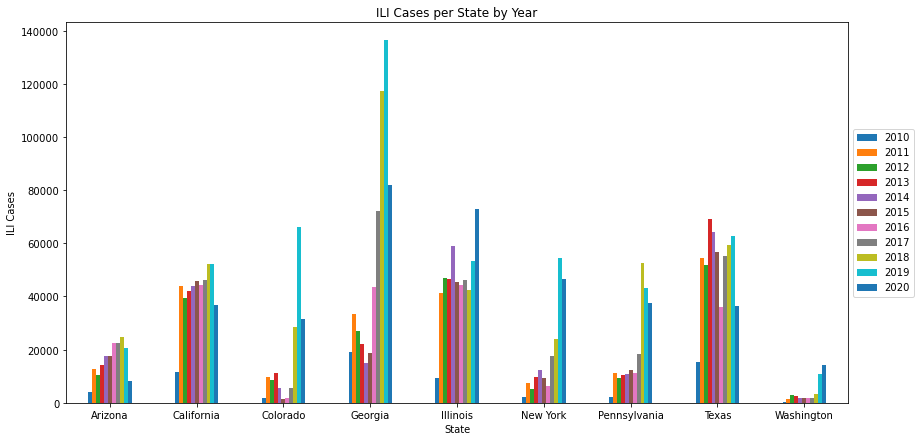

In [6]:
bar_plot = state_group['ILITOTAL'].sum().unstack().plot(kind='bar', legend=False, figsize=(14,7), rot = 0,
                                             title='ILI Cases per State by Year')
bar_plot.set_ylabel('ILI Cases')
bar_plot.legend(loc='center left', bbox_to_anchor=(1.0,0.5))
plt.show()

In [7]:
sns.set(style="ticks")

C:\Users\track\anaconda3\envs\ProjectData\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


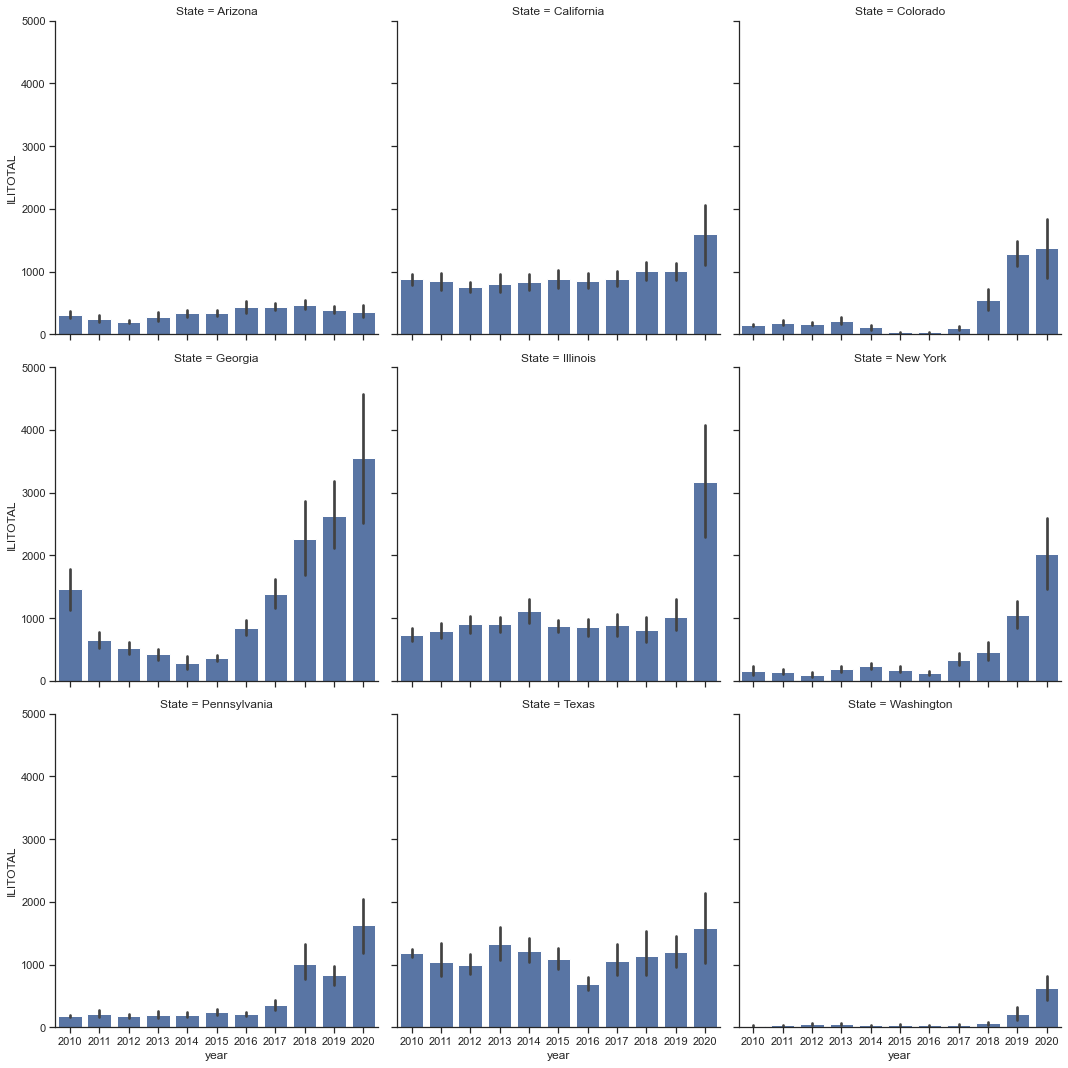

In [8]:
g = sns.FacetGrid(renamed_df, col="State", col_wrap=3, height = 5, aspect=1, ylim=(0,5000))
g.map(sns.barplot,"year", "ILITOTAL")